In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
import time
import random
from datetime import datetime, timedelta
from shapely.geometry import Point
from busSim import BusSim

In [2]:
DATA_PATH = "./data"
DAY = "monday"
START_TIME = "12:00:00"
ELAPSE_TIME = "00:30:00"
AVG_WALKING_SPEED = 1.4  # 1.4 meters per second
MAX_WALKING_MIN = 10

In [5]:
def fmin(minutes):
    return f"{minutes // 60}:{minutes % 60}:00"

# doesn't account for time span across 2 days (not implement for across bus schedule: weekday -> weekend)
def every_time(interval, elapse_time):
    start_times = []
    curr = 0
    min_total = 24 * 60 - elapse_time
    while curr <= min_total:
        start_times.append(fmin(curr))
        curr += interval

    return start_times

In [4]:
start_times = every_time(10, 30)
perf = pd.DataFrame()

ts = time.time()
for t in start_times:
    # print(t)
    t0 = time.time()
    busSim = BusSim(DATA_PATH, DAY, t, ELAPSE_TIME, AVG_WALKING_SPEED, MAX_WALKING_MIN)
    t1 = time.time()
    busSim.get_gdf(start_point=(43.073691, -89.387407))
    t2 = time.time()
    perf.loc[t, "graph-gen"] = t1 - t0
    perf.loc[t, "gen-dataframe"] = t2 - t1
    perf.loc[t, "total"] = t2 - t0
    perf.loc[t, "nodes-num"] = len(busSim.graph.nodes)

te = time.time()
perf

2021-02-04 14:32:02,068 - INFO - start
2021-02-04 14:32:03,021 - INFO - start
2021-02-04 14:32:03,909 - INFO - start
2021-02-04 14:32:04,787 - INFO - start


,graph-gen,gen-dataframe,total,nodes-num
0:0:00,0.949680,0.000006,0.949686,0.0
0:10:00,0.887101,0.000004,0.887105,0.0
0:20:00,0.876934,0.000005,0.876939,0.0
0:30:00,0.859974,0.000005,0.859979,0.0


In [5]:
te - ts #was 340.2730429172516

291.0682668685913

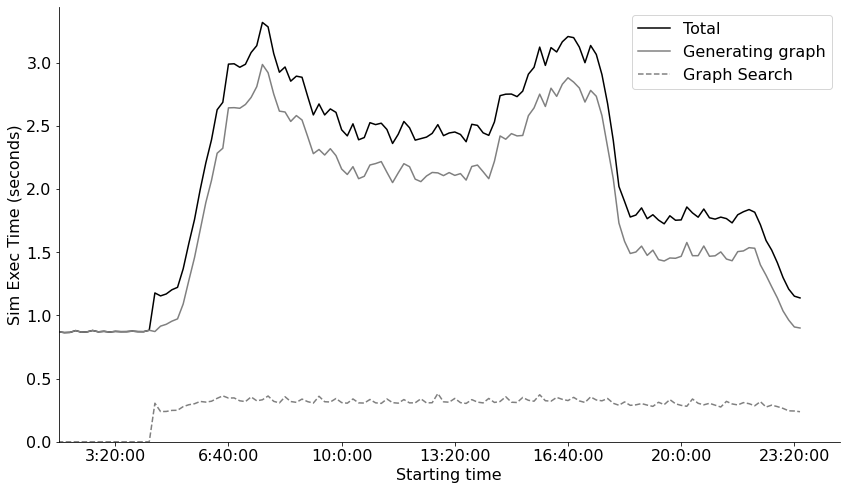

In [6]:
plt.rcParams["font.size"] = 16

fig, ax = plt.subplots(figsize=(14,8))
perf["total"].plot.line(ax=ax, label="Total", color="k", xlim=10, ylim=0)
perf["graph-gen"].plot.line(ax=ax, label="Generating graph", color="0.5")
perf["gen-dataframe"].plot.line(ax=ax, label="Graph Search", color="0.5", linestyle="--")
ax.set_xlabel("Starting time")
ax.set_ylabel("Sim Exec Time (seconds)")
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.legend()

2162.0

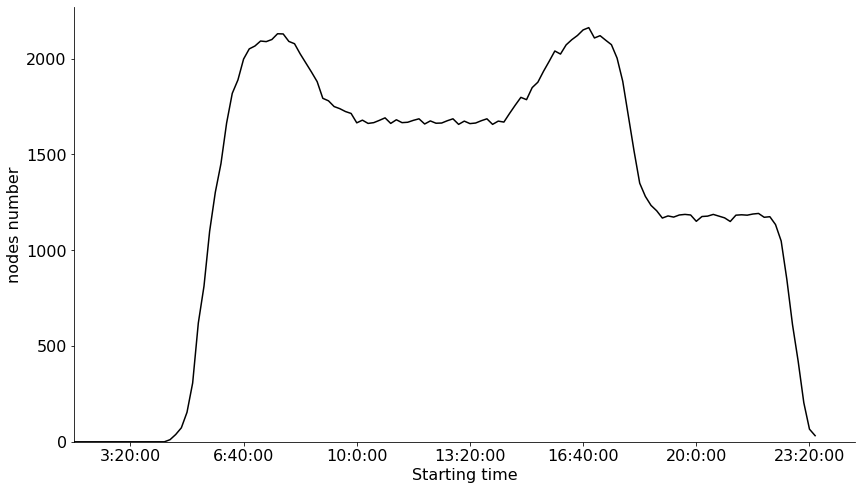

In [7]:
fig, ax = plt.subplots(figsize=(14,8))
perf["nodes-num"].plot.line(ax=ax, label="nodes number", color="k", xlim=10, ylim=0)
ax.set_xlabel("Starting time")
ax.set_ylabel("nodes number")
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

perf["nodes-num"].max()

In [ ]:
def gen_locations(num):
    mmt_gtfs_path = os.path.join(DATA_PATH, "mmt_gtfs")
    stops_df = pd.read_csv(os.path.join(
        mmt_gtfs_path, "stops.csv"), sep=",")
    
    lat_min = stops_df.stop_lat.min()
    lat_max = stops_df.stop_lat.max()
    lon_min = stops_df.stop_lon.min()
    lon_max = stops_df.stop_lon.max()
    lat = random.random() * (lat_max - lat_min) + lat_min
    lon = random.random() * (lon_max - lon_min) + lon_min


In [ ]:
busSim = BusSim(DATA_PATH, DAY, "12:00:00", ELAPSE_TIME, AVG_WALKING_SPEED, MAX_WALKING_MIN)


In [23]:
mmt_gtfs_path = os.path.join(DATA_PATH, "mmt_gtfs")
stops_df = pd.read_csv(os.path.join(
    mmt_gtfs_path, "stops.csv"), sep=",")